In [161]:
import gc
import numpy as np
from scipy.stats import bernoulli

alpha = 0.05
p = 0.4
sample_size = 10000
n = 10000
ns = np.arange(1, n + 1)
eps_n = np.sqrt((1/(2 * ns)) * np.log(2/alpha))

p_hat = np.empty((sample_size, n))

for i in range(sample_size):
    X = bernoulli.rvs(p, size=n, random_state=i)
    p_hat[i] = np.cumsum(X) / ns

coverage = np.mean((p_hat+eps_n >= p) & (p_hat-eps_n <= p), axis=0)

In [162]:
interval = np.mean(np.minimum(p_hat+eps_n, 1) - np.maximum(p_hat-eps_n, 0), axis=0)
threshold_n = np.argmax(interval <= 0.05) + 1

del eps_n, p_hat
_ = gc.collect()

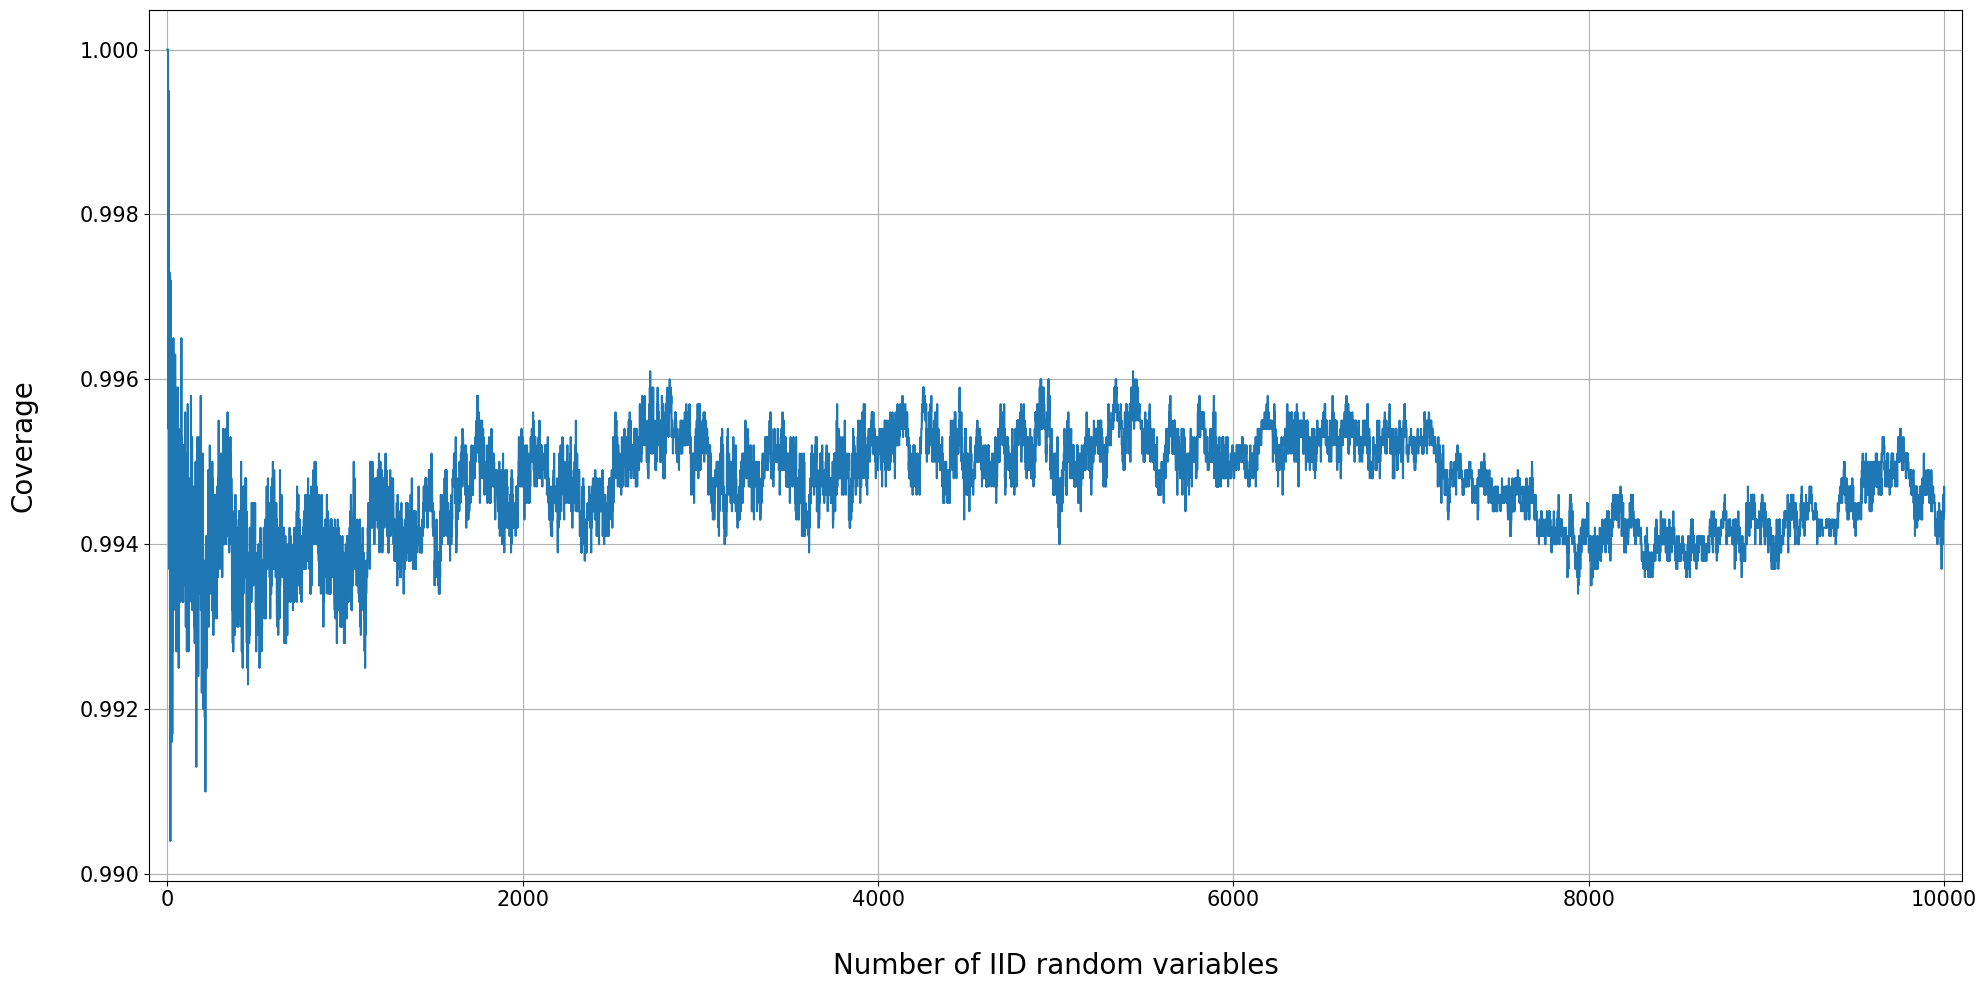

3060

In [163]:
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = [20, 10]
plt.rcParams["figure.autolayout"] = True
plt.xlim([-100, sample_size+100])

font_size = 20
label_pad = 30

plt.plot(ns, coverage)

plt.xlabel('Number of IID random variables', fontsize=font_size, labelpad=label_pad)
plt.ylabel('Coverage', fontsize=font_size, labelpad=label_pad)

plt.xticks(fontsize=0.75*font_size)
plt.yticks(fontsize=0.75*font_size)

plt.grid()
plt.show()

del coverage
gc.collect()

threshold_n=2952


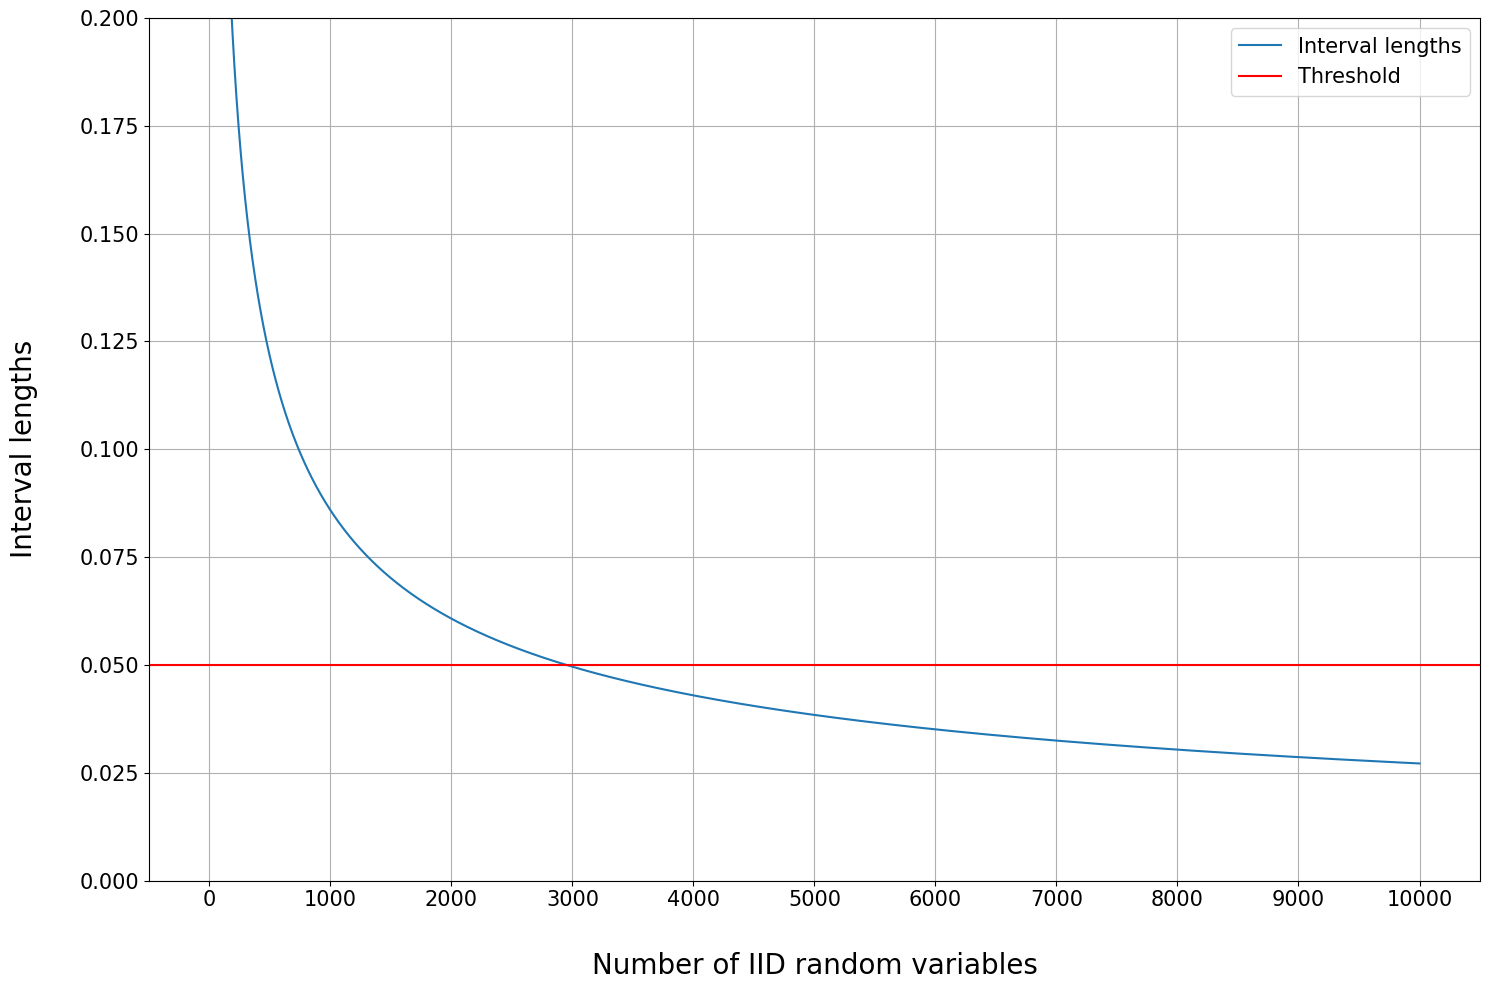

In [164]:
print(f'{threshold_n=}')

plt.rcParams["figure.figsize"] = [15, 10]
plt.ylim([0, 0.2])

font_size = 20
label_pad = 30

plt.plot(ns, interval, label='Interval lengths')
plt.axhline(y=0.05, color='r', linestyle='-', label='Threshold')

del ns, interval
_ = gc.collect()

plt.xlabel('Number of IID random variables', fontsize=font_size, labelpad=label_pad)
plt.ylabel('Interval lengths', fontsize=font_size, labelpad=label_pad)

plt.legend(fontsize=0.75*font_size)

plt.xticks(ticks=range(0, sample_size+1, 1000), fontsize=0.75*font_size)
plt.yticks(fontsize=0.75*font_size)

plt.grid()
plt.show()